In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [2]:
pulsos = pd.read_csv("PulsosPorLitro4", delimiter=' ', header=None, names=['Pulsos', 'Litros'])
vec_litros = pulsos['Litros'].to_list()
vec_pulsos = pulsos['Pulsos'].to_list()
#pulsos.set_index('Pulsos', inplace=True)
pulsos

FileNotFoundError: [Errno 2] No such file or directory: 'PulsosPorLitro4'

In [ ]:
media_pulsos = np.mean(vec_pulsos) 
desvioP = np.std(vec_pulsos)
erroRel = desvioP / media_pulsos

print(f"\nMedia dos Pulsos: {media_pulsos}")
print(f"\nErro relativo dos Pulsos: {erroRel}")


Media dos Pulsos: 1671.95

Erro relativo dos Pulsos: 0.01696284026769833


In [ ]:
media_litros = np.mean(vec_litros)
desvioPad = np.std(vec_litros)
erroRel = desvioPad / media_litros

print(f"\nMedia dos Litros: {media_litros}")
print(f"\nErro relativo dos Litros: {erroRel}")

#Robert erro
valor_medido = vec_litros

error_medida = []
for i in range(len(vec_litros)):
    error_medida.append(vec_litros[i] - 3000)
erroMedida_Media = abs(np.mean(error_medida))
erro_porcentagem = (erroMedida_Media/3000)*100
print(f"Erro da medida: {erroMedida_Media} ----- > {erro_porcentagem}%")


Media dos Litros: 3907.75

Erro relativo dos Litros: 0.050889769131295566
Erro da medida: 907.75 ----- > 30.258333333333333%


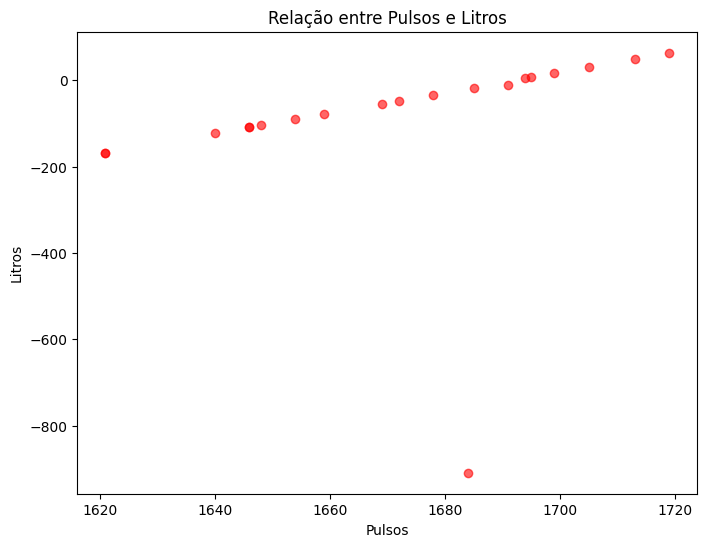

In [ ]:
plt.figure(figsize=(8, 6))
relative_litros = []
for i in range(len(vec_litros)):
    relative_litros.append(vec_litros[i] - 4000)
plt.scatter(vec_pulsos, relative_litros, color='red', alpha=0.6)
plt.title('Relação entre Pulsos e Litros')
plt.xlabel('Pulsos')
plt.ylabel('Litros')
plt.show()


In [ ]:
pulsos = pd.read_csv("PulsosPorLitro4", delimiter=' ', header=None, names=['Pulsos', 'Litros'])
vec_litros = pulsos['Litros'].to_list()
vec_pulsos = pulsos['Pulsos'].to_list()

In [ ]:
media_pulsos = np.mean(vec_pulsos) 
desvioP = np.std(vec_pulsos)
erroRel = desvioP / media_pulsos

print(f"\nMedia dos Pulsos: {media_pulsos}")
print(f"\nErro relativo dos Pulsos: {erroRel}")


Media dos Pulsos: 1671.95

Erro relativo dos Pulsos: 0.01696284026769833


In [ ]:
media_litros = np.mean(vec_litros)
desvioPad = np.std(vec_litros)
erroRel = desvioPad / media_litros

print(f"\nMedia dos Litros: {media_litros}")
print(f"\nErro relativo dos Litros: {erroRel}")

#Erro medida
valor_medido = vec_litros
erro_medida = []

for i in range(len(vec_litros)):
    erro_medida.append(vec_litros[i] - 4000)
erroMedidaMedia = abs(np.mean(erro_medida))
erro_porcentagem = (erroMedidaMedia/4000)*100
print(f"Erro da medida: {erroMedidaMedia} ----- > {erro_porcentagem}%")


Media dos Litros: 3907.75

Erro relativo dos Litros: 0.050889769131295566
Erro da medida: 92.25 ----- > 2.30625%


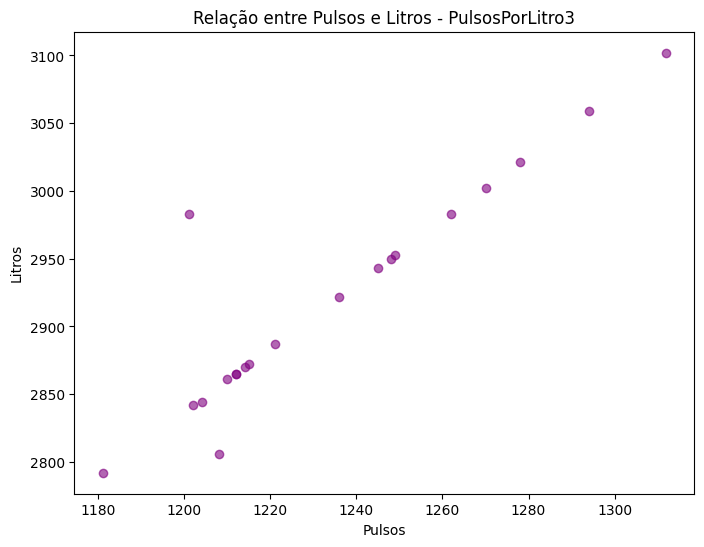

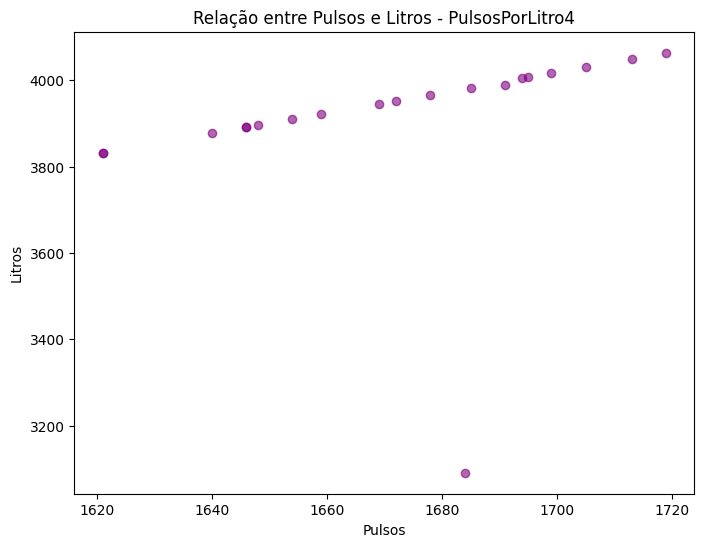

In [18]:
def processar_arquivo(filepath):
    try:
        # Leitura dos dados
        pulsos = pd.read_csv(filepath, delimiter=' ', header=None, names=['Pulsos', 'Litros'])
        vec_pulsos = pulsos['Pulsos'].to_list()
        vec_litros = pulsos['Litros'].to_list()

        # Verificar se as listas não estão vazias
        if not vec_pulsos or not vec_litros:
            print(f"Dados vazios no arquivo {filepath}")
            return None, None, None

        # Cálculos estatísticos
        media_pulsos = np.mean(vec_pulsos)
        desvioP = np.std(vec_pulsos)
        erroR = desvioP / media_pulsos

        media_litros = np.mean(vec_litros)

        # Resultados
        resultados = {
            'Media_pulsos': media_pulsos,
            'Erro_relativo_pulsos': erroR,
            'Media_litros': media_litros
        }

        return resultados, vec_pulsos, vec_litros
    except Exception as e:
        print(f"Erro ao processar o arquivo {filepath}: {e}")
        return None, None, None

# Diretório contendo os arquivos
diretorio = 'Pulsos'

# Lista para armazenar todos os resultados
todos_resultados = []
# Iterar sobre os arquivos no diretório
arquivos = os.listdir(diretorio)
for filename in arquivos:
    filepath = os.path.join(diretorio, filename)
    resultados, vec_pulsos, vec_litros = processar_arquivo(filepath)
    if resultados is not None:
        # Adicionar os resultados à lista
        todos_resultados.append({'filename': filename, **resultados})
        # Plotando o gráfico de dispersão para cada arquivo
        plt.figure(figsize=(8, 6))
        plt.scatter(vec_pulsos, vec_litros, color='purple', alpha=0.6)
        plt.title(f'Relação entre Pulsos e Litros - {filename}')
        plt.xlabel('Pulsos')
        plt.ylabel('Litros')
        plt.show()
    else:
        print(f"Não foram gerados resultados para o arquivo {filename}")